# CIFAR 10 - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


* Train_Data Information

In [3]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)

50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [4]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

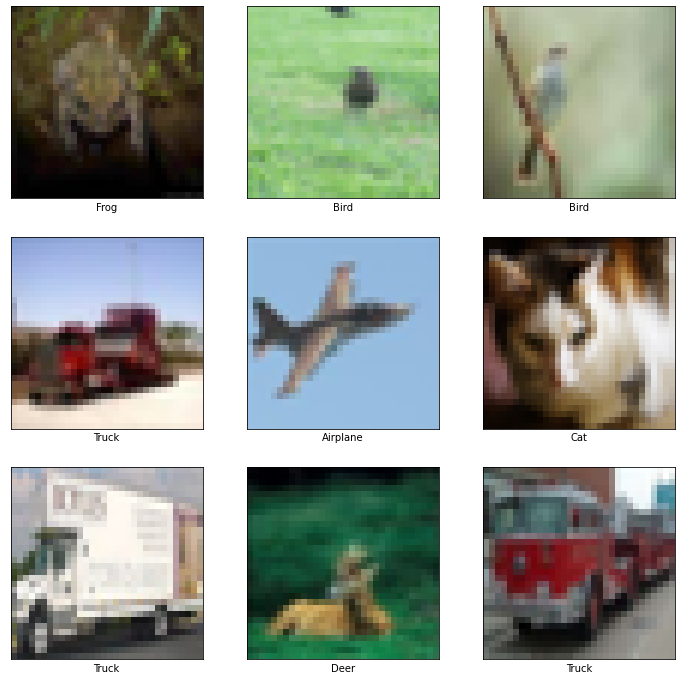

In [5]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(50000,
                            size = 9) 

plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
    
plt.show()

* RGB Channels

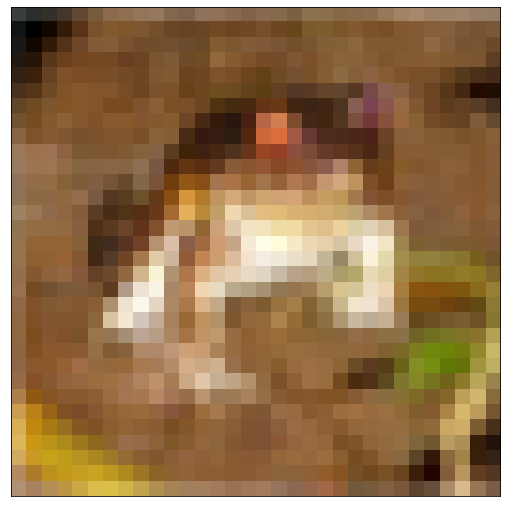

In [12]:
digit = X_train[0]

plt.figure(figsize = (9, 9))
plt.imshow(digit)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
import numpy as np
import sys
np.set_printoptions(linewidth = 150, threshold = sys.maxsize)

print(y_train[0])
print()
print(X_train[0][0][0])
# print(X_train[0][:, :, 0])

[6]

[59 62 63]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [ ]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 3개의 Hidden Layers & 2816개의 Nodes
 - Dropout Layer

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

CIFAR = models.Sequential()
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape = (32 * 32 * 3,)))
# CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(512, activation = 'relu'))
# CIFAR.add(layers.Dropout(0.4))
CIFAR.add(layers.Dense(128, activation = 'relu'))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [ ]:
CIFAR.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7,409,546
Trainable params: 7,409,546
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Callbacks( )

> ### (1) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 50, 
                   verbose = 1)

> ### (2) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_CIFAR.h5', 
                     monitor = 'val_accuracy', 
                     mode = 'max', 
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit

* 약 3분

In [ ]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 500,
                       batch_size = 128,
                       callbacks = [es, mc],
                       validation_data = (X_valid, y_valid))

Epoch 1/500
308/313 [============================>.] - ETA: 0s - loss: 2.0193 - accuracy: 0.2854
Epoch 1: val_accuracy improved from -inf to 0.35170, saving model to best_CIFAR.h5
313/313 [==============================] - 4s 7ms/step - loss: 2.0144 - accuracy: 0.2869 - val_loss: 1.8017 - val_accuracy: 0.3517
Epoch 2/500
303/313 [============================>.] - ETA: 0s - loss: 1.7233 - accuracy: 0.3836
Epoch 2: val_accuracy improved from 0.35170 to 0.40990, saving model to best_CIFAR.h5
313/313 [==============================] - 2s 6ms/step - loss: 1.7213 - accuracy: 0.3848 - val_loss: 1.6523 - val_accuracy: 0.4099
Epoch 3/500
303/313 [============================>.] - ETA: 0s - loss: 1.6267 - accuracy: 0.4186
Epoch 3: val_accuracy did not improve from 0.40990
313/313 [==============================] - 2s 5ms/step - loss: 1.6291 - accuracy: 0.4178 - val_loss: 1.6641 - val_accuracy: 0.4069
Epoch 4/500
307/313 [============================>.] - ETA: 0s - loss: 1.5797 - accuracy: 0.4360

> ## 5) 학습 결과 시각화

* Loss Visualization

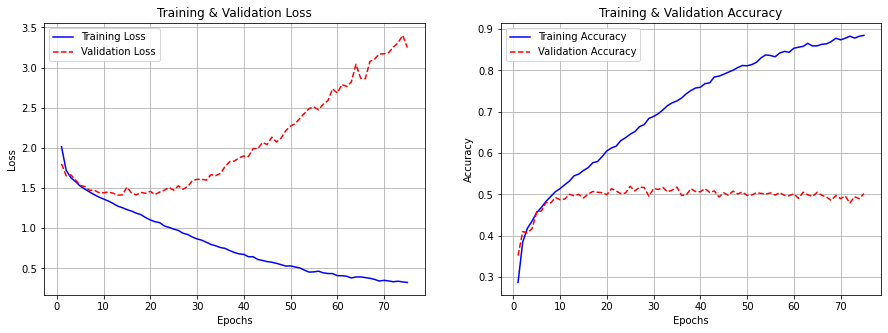

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CIFAR.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_CIFAR.history['loss'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_CIFAR.history['accuracy'], 'b-')
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 6) Load Best Model

In [ ]:
!ls -l

total 86876
-rw-r--r-- 1 root root 88954024 Jan 18 01:29 best_CIFAR.h5
drwxr-xr-x 1 root root     4096 Jan 13 14:34 sample_data


In [ ]:
from tensorflow.keras.models import load_model

best_CIFAR = load_model('best_CIFAR.h5')

> ## 7) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = best_CIFAR.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 1.47075
Accuracy = 0.51000


> ## 8) Model Predict

* Probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)

print(best_CIFAR.predict(X_test[:1,:], verbose = 0))

[[0.08884151  0.018722197 0.061930083 0.55614156  0.07351958  0.13688229  0.00100589  0.006864027 0.04219343  0.013899429]]


* Class

In [ ]:
print(np.argmax(best_CIFAR.predict(X_test[:1,:], verbose = 0)))

3


> ## 9) Image Visualization

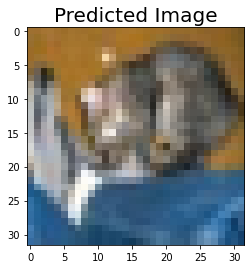

In [ ]:
plt.imshow(X_test[0].reshape(32, 32, 3), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

# 
# 
# 
# The End
# 
# 
# 